### This notebook involves the Anomaly detection in Stock transactions.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.mstats import mquantiles
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

Read the dataset

In [ ]:
df = pd.read_csv('CREX.csv')

In [ ]:
df.index+=1           # To start index from 1 instead of 0

In [ ]:
df.head()

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout
1,CREX,2018-11-16,3.05,10.752688,71838,0,0,0,0,394.84445,260,1,0
2,CREX,2018-11-19,2.99,2.622951,45460,0,1,0,1,280.59512,234,3,0
3,CREX,2018-11-20,3.12,14.715719,112457,0,3,2,3,413.19757,432,7,2
4,CREX,2018-11-21,3.30,8.012820,9903,0,0,0,0,235.26692,45,7,2
5,CREX,2018-11-23,3.35,2.727273,843,0,1,0,0,159.88638,11,14,2


In [ ]:
df.shape

(518, 13)

In [ ]:
# Check the rows for which change3 == 1
df[df.change3 ==1]

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout
344,CREX,2020-04-23,0.84,12.000000,13773,1,6,3,2,848.82904,45,16,37
345,CREX,2020-04-24,0.82,0.000000,1989,1,0,0,0,246.12035,32,16,27
346,CREX,2020-04-27,1.00,21.951220,40994,1,11,25,1,216.89069,212,16,4
355,CREX,2020-05-08,2.78,9.701492,784376,1,3,1,0,874.30273,2099,109,8


In [ ]:
# Drop reduntant columns
cols = ['ticker', 'date']
df_trans = df.drop(cols, axis=1)

In [ ]:
df_trans.head()

,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout
1,3.05,10.752688,71838,0,0,0,0,394.84445,260,1,0
2,2.99,2.622951,45460,0,1,0,1,280.59512,234,3,0
3,3.12,14.715719,112457,0,3,2,3,413.19757,432,7,2
4,3.30,8.012820,9903,0,0,0,0,235.26692,45,7,2
5,3.35,2.727273,843,0,1,0,0,159.88638,11,14,2


In [ ]:
df_trans.shape

(518, 11)

**Data Scaling using MinMax Scaler**

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer(n_quantiles = df.shape[0], output_distribution = 'uniform')
 # Fit & transform our data
df_scaled = scaler.fit_transform(df_trans.values)

In [ ]:
df_scaled

array([[0.94390716, 0.86460348, 0.65377176, ..., 0.6615087 , 0.        ,
        0.        ],
       [0.93713733, 0.4622824 , 0.62475822, ..., 0.64990329, 0.01837524,
        0.        ],
       [0.9622824 , 0.91489362, 0.70212766, ..., 0.72727273, 0.13829787,
        0.04642166],
       ...,
       [0.27756286, 0.9729207 , 0.96131528, ..., 0.93810445, 0.29303675,
        0.51257253],
       [0.21470019, 0.13926499, 0.89361702, ..., 0.84139265, 0.29303675,
        0.41972921],
       [0.24371373, 0.81141199, 0.83558994, ..., 0.79303675, 0.29303675,
        0.41972921]])

**Isolation Forest**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
#Initialize Isolation Forest
# contamination is the proportion of anomalies in our dataset. I'm assuming 1% of observations are anomalies
clf = IsolationForest(contamination = 0.01, random_state=42)

# Fit the data
clf.fit(df_scaled)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [ ]:
# Predict clusters
y_pred = clf.predict(df_scaled)

In [ ]:
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [ ]:
# Add y_pred to df column
df_iso = df.copy()
df_iso['clusters_iso'] = y_pred

In [ ]:
# Data point is anomaly if pred == -1
outliers = df_iso.loc[df_iso['clusters_iso']==-1]
outlier_index_iso=list(outliers.index)
# Index of outliers
outlier_index_iso

[85, 344, 346, 347, 355, 358]

Now, We will try to visualize the results and check if the clustering makes sense. Normalize and fit the dimensions to a PCA to reduce the number of dimensions and then plot them in 3D highlighting the anomalies.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# Define a function to plot 3D highlighting the anomalies
def Axes3d_plot(df, outlier_index, method):
  # Initialize PCA
  pca = PCA(n_components=3)  # Reduce to k=3 dimensions
  # Fit
  df_pca = pca.fit_transform(df)

  # Plot PCA components
  fig = plt.figure(figsize = (12, 6))
  ax = fig.add_subplot(111, projection='3d')
  ax.set_title(f'PCA components with normal stars, & anomalies - {method}')
  ax.set_xlabel("X component")
  ax.set_ylabel("Y component")
  ax.set_zlabel("Z component")
  # Plot the compressed data points
  ax.scatter(df_pca[:, 0], df_pca[:, 1], zs=df_pca[:, 2], s=4, lw=1, label="normal",c="green")
  # Plot x's for the ground truth outliers
  ax.scatter(df_pca[outlier_index,0],df_pca[outlier_index,1], df_pca[outlier_index,2],
           lw=2, s=60, marker="x", c="red", label="Anomalies")
  ax.legend()
  plt.show()

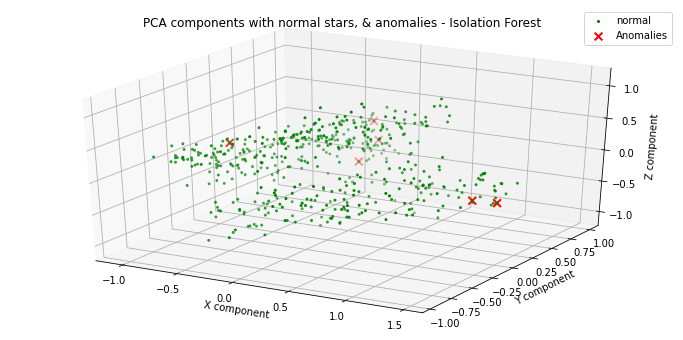

In [ ]:
# Plot 3D for Isolation forest
Axes3d_plot(df_scaled, outlier_index_iso, 'Isolation Forest')

In [ ]:
# Anomalies
df_iso[df_iso['clusters_iso']== -1]

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,clusters_iso
85,CREX,2019-03-27,2.61,56.540085,1024067,0,56,56,56,397.47076,4122,138,52,-1
344,CREX,2020-04-23,0.84,12.000000,13773,1,6,3,2,848.82904,45,16,37,-1
346,CREX,2020-04-27,1.00,21.951220,40994,1,11,25,1,216.89069,212,16,4,-1
347,CREX,2020-04-28,4.08,336.000000,66256416,0,247,247,247,521.17970,270825,12,256,-1
355,CREX,2020-05-08,2.78,9.701492,784376,1,3,1,0,874.30273,2099,109,8,-1
358,CREX,2020-05-13,4.58,85.139320,29439440,0,248,10,0,640.97565,116365,109,27,-1


In [ ]:
# Get the anomalies
y_scores = clf.score_samples(df_scaled)

In [ ]:
y_scores

array([-0.52519976, -0.56945679, -0.54029439, -0.50810361, -0.54801165,
       -0.50130158, -0.50962183, -0.51347166, -0.50944697, -0.51209942,
       -0.54442573, -0.51775332, -0.50730817, -0.50723581, -0.5265675 ,
       -0.48748827, -0.48928056, -0.49029887, -0.52163105, -0.48891872,
       -0.51523557, -0.50575089, -0.48984347, -0.49434064, -0.5048981 ,
       -0.44382971, -0.49098247, -0.46811935, -0.50957309, -0.55216584,
       -0.5514316 , -0.54090107, -0.49976917, -0.49439991, -0.51869179,
       -0.47418925, -0.51561821, -0.51798289, -0.49335984, -0.54307882,
       -0.46739666, -0.49620081, -0.51647814, -0.51944786, -0.50440814,
       -0.52845724, -0.54971057, -0.51104255, -0.45079946, -0.48895181,
       -0.50734859, -0.51139771, -0.53073171, -0.49703515, -0.52513059,
       -0.53733293, -0.54977546, -0.49167766, -0.46728162, -0.49730888,
       -0.50029226, -0.49114741, -0.54219257, -0.52624949, -0.50235008,
       -0.50329858, -0.45968727, -0.50141396, -0.50162596, -0.49

In [ ]:
# Add y_scores to df_iso
df_iso['Anomaly Score'] = y_scores

In [ ]:
# Check anomalies
df_iso[df_iso['clusters_iso']== -1]

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,clusters_iso,Anomaly Score
85,CREX,2019-03-27,2.61,56.540085,1024067,0,56,56,56,397.47076,4122,138,52,-1,-0.594372
344,CREX,2020-04-23,0.84,12.000000,13773,1,6,3,2,848.82904,45,16,37,-1,-0.614248
346,CREX,2020-04-27,1.00,21.951220,40994,1,11,25,1,216.89069,212,16,4,-1,-0.629976
347,CREX,2020-04-28,4.08,336.000000,66256416,0,247,247,247,521.17970,270825,12,256,-1,-0.604386
355,CREX,2020-05-08,2.78,9.701492,784376,1,3,1,0,874.30273,2099,109,8,-1,-0.624847
358,CREX,2020-05-13,4.58,85.139320,29439440,0,248,10,0,640.97565,116365,109,27,-1,-0.606552


In [ ]:
print('Number of outliers:', len(df_iso[df_iso['clusters_iso']== -1]))

Number of outliers: 6


In [ ]:
# Threshold value
# If threshold value < Anamoly score ---> an Anamoly if not a normal transaction
iso_score = df_iso['Anomaly Score'].values
tau_iso = stats.scoreatpercentile(iso_score, 100*0.01)
print(f'Threshold value : {tau_iso}')

Threshold value : -0.592980975191986


**Kernel Density estimator (KDE)**

It helps us measure kernel density of samples which can be then used to take out outliers. It uses KDTree or BallTree algorithm for kernel density estimation. We are using 'gaussian' kernel for this estimation.

In [ ]:
from sklearn.neighbors.kde import KernelDensity

# Estimate density with a Gaussian kernel density estimator
kde = KernelDensity(kernel='gaussian')
kde.fit(df_scaled)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

Calculate Log Density Evaluations for Each Sample using score_samples() function.

In [ ]:
# Get the Anamoly score for KDE
kde_score = kde.score_samples(df_scaled)

Dividing Dataset into Valid Samples and Outliers

We'll divide these values into 99% as valid data and 1% as outliers based on the output of score_samples() function.

In [ ]:
from scipy.stats.mstats import mquantiles

alpha_set = 0.99   # Data excluding outlier, I'm assuming 1% of observations are anomalies
tau_kde = mquantiles(kde_score, 1. - alpha_set)       # Threshold value
print(f'Threshold value : {tau_kde}')

Threshold value : [-11.56703728]


All the values in df_kde array which are less than tau_kde will be outliers and values greater than it will be qualified as normal samples. We'll try to find out indexes of samples that are outliers and normal. We'll then use these indexes to filter data to divide it into outliers and normal samples.

In [ ]:
# Anamolies
outliers = np.argwhere(kde_score < tau_kde)
outliers_index_kde = outliers.flatten()
kde_outliers = df.values[outliers_index_kde]
kde_outliers = pd.DataFrame(kde_outliers, columns = df.columns)

# Normal transactions
normal_samples = np.argwhere(kde_score >= tau_kde)
normal_samples = normal_samples.flatten()
kde_valid = df.values[normal_samples]

print("Original Samples : ",df_iso.shape[0])
print("Number of Anomalies : ", len(outliers))
print("Number of Normal Samples : ", len(normal_samples))

Original Samples :  518
Number of Anomalies :  5
Number of Normal Samples :  513


In [ ]:
# Outliers
kde_outliers['Index'] = outliers_index_kde
kde_outliers = kde_outliers.set_index('Index')
kde_outliers.index+=1
kde_outliers

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout
Index,,,,,,,,,,,,,
344,CREX,2020-04-23,0.84,12,13773,1,6,3,2,848.829,45,16,37
346,CREX,2020-04-27,1,21.9512,40994,1,11,25,1,216.891,212,16,4
347,CREX,2020-04-28,4.08,336,66256416,0,247,247,247,521.18,270825,12,256
355,CREX,2020-05-08,2.78,9.70149,784376,1,3,1,0,874.303,2099,109,8
358,CREX,2020-05-13,4.58,85.1393,29439440,0,248,10,0,640.976,116365,109,27


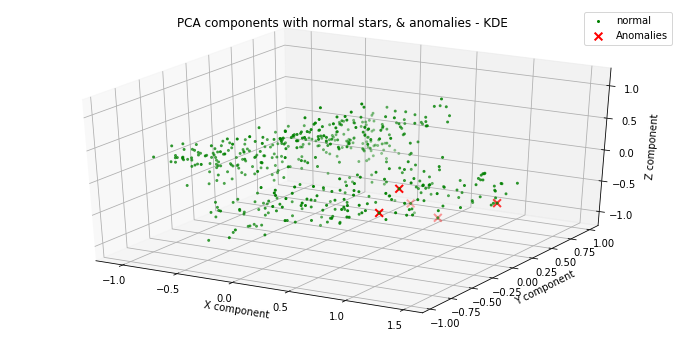

In [ ]:
# Plot 3D for Isolation forest
Axes3d_plot(df_scaled, outliers_index_kde, 'KDE')

**Local Outlier Factor (LOF)**

It measures the local density of a sample with respect to its neighbors. Based on a comparison between the local density of the sample and its neighbors, the decision is made whether the sample is an outlier or not.

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
# Initialize LOF
# contamination is the proportion of anomalies in our dataset. I'm assuming 1% of observations are anomalies
lof = LocalOutlierFactor(contamination = 0.01, metric = 'euclidean')

# fit data 
lof.fit(df_scaled)

LocalOutlierFactor(algorithm='auto', contamination=0.01, leaf_size=30,
                   metric='euclidean', metric_params=None, n_jobs=None,
                   n_neighbors=20, novelty=False, p=2)

LOF provides fit_predict() method which accepts samples and returns array consisting of values 1 or -1. Here 1 represents a valid sample and -1 represents an outlier.

In [ ]:
preds = lof.fit_predict(df_scaled)

# Take a copy of df_lof
df_lof = df.copy()
# Add preds to df_lof
df_lof['cluster_lof'] = preds

In [ ]:
# Anomaly score
df_lof['Anomaly score'] = lof.negative_outlier_factor_

Dividing Dataset into Normal Samples and Anamolies

In [ ]:
lof_outliers = df_lof.values[preds == -1]   # -1 --> anomalies
lof_valid = df_lof.values[preds != -1]
lof_outliers_index = df_lof.index[preds == -1]

print("Original Samples : ",df_lof.shape[0])
print("Number of Outliers : ", lof_outliers.shape[0])
print("Number of Normal Samples : ", lof_valid.shape[0])

Original Samples :  518
Number of Outliers :  6
Number of Normal Samples :  512


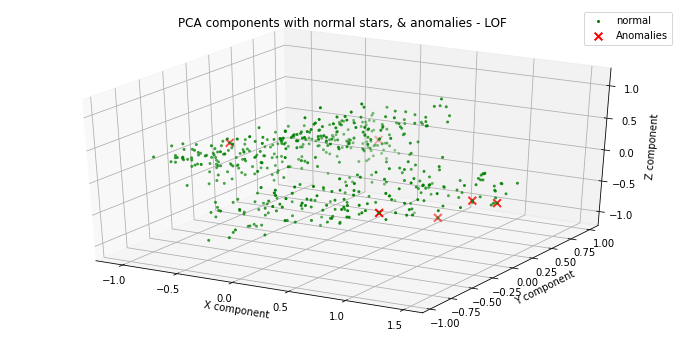

In [ ]:
# Plot 3D for LocalOutlierFactor
Axes3d_plot(df_scaled, list(lof_outliers_index), 'LOF')

In [ ]:
# Create a dataframe for lof_outliers
lof_outliers = pd.DataFrame(lof_outliers, columns = df_lof.columns)
lof_outliers['Index'] = lof_outliers_index
lof_outliers = lof_outliers.set_index('Index')
lof_outliers.index+=1
lof_outliers

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,cluster_lof,Anomaly score
Index,,,,,,,,,,,,,,,
345,CREX,2020-04-23,0.84,12,13773,1,6,3,2,848.829,45,16,37,-1,-1.61959
346,CREX,2020-04-24,0.82,0,1989,1,0,0,0,246.12,32,16,27,-1,-1.98679
347,CREX,2020-04-27,1,21.9512,40994,1,11,25,1,216.891,212,16,4,-1,-1.74564
356,CREX,2020-05-08,2.78,9.70149,784376,1,3,1,0,874.303,2099,109,8,-1,-1.61851
358,CREX,2020-05-12,3.23,21.7391,4694309,0,9,0,9,1111.93,13792,109,18,-1,-1.38997
359,CREX,2020-05-13,4.58,85.1393,29439440,0,248,10,0,640.976,116365,109,27,-1,-1.33846


In [ ]:
# Threshold value
# If threshold value < Anomaly score ---> an Anomaly if not a normal transaction
lof_score = df_lof['Anomaly score'].values
tau_lof = stats.scoreatpercentile(lof_score, 100*0.01)
print(f'Threshold value : {tau_lof}')

Threshold value : -1.3360492700935598


In [ ]:
# Filtering anomalies from our dataset
df_filtered1  = df_lof[df_lof['cluster_lof'] !=-1].reset_index(drop=True)
df_filtered1

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,cluster_lof,Anomaly score
0,CREX,2018-11-16,3.05,10.752688,71838,0,0,0,0,394.84445,260,1,0,1,-1.146211
1,CREX,2018-11-19,2.99,2.622951,45460,0,1,0,1,280.59512,234,3,0,1,-1.289559
2,CREX,2018-11-20,3.12,14.715719,112457,0,3,2,3,413.19757,432,7,2,1,-1.057026
3,CREX,2018-11-21,3.30,8.012820,9903,0,0,0,0,235.26692,45,7,2,1,-1.149173
4,CREX,2018-11-23,3.35,2.727273,843,0,1,0,0,159.88638,11,14,2,1,-1.151161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,CREX,2020-12-23,1.22,10.810811,688986,0,5,6,5,1732.19680,1267,10,11,1,-0.990618
508,CREX,2020-12-24,1.30,10.655738,866043,0,7,7,6,1436.53980,1778,10,10,1,-0.993014
509,CREX,2020-12-28,1.48,28.461538,1772823,0,87,8,8,1411.19180,3202,10,10,1,-0.992229
510,CREX,2020-12-29,1.32,-0.675676,613006,0,0,0,0,1796.10340,1106,10,8,1,-0.990078


In [ ]:
df_filtered1.shape

(512, 15)

In [ ]:
# Filtering anomalies from our dataset by Anomaly score
# Sort values by Anomaly score in ascending order ---> lowest to highest
df_lof = df_lof.sort_values(by = ['Anomaly score'])
# Check first 6 index values
df_lof.head(6)

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,cluster_lof,Anomaly score
345,CREX,2020-04-24,0.82,0.000000,1989,1,0,0,0,246.12035,32,16,27,-1,-1.986786
346,CREX,2020-04-27,1.00,21.951220,40994,1,11,25,1,216.89069,212,16,4,-1,-1.745638
344,CREX,2020-04-23,0.84,12.000000,13773,1,6,3,2,848.82904,45,16,37,-1,-1.619590
355,CREX,2020-05-08,2.78,9.701492,784376,1,3,1,0,874.30273,2099,109,8,-1,-1.618506
357,CREX,2020-05-12,3.23,21.739130,4694309,0,9,0,9,1111.93070,13792,109,18,-1,-1.389971
358,CREX,2020-05-13,4.58,85.139320,29439440,0,248,10,0,640.97565,116365,109,27,-1,-1.338455


In [ ]:
# Filter anamolies
df_filtered2 = df_lof[df_lof['Anomaly score'] > tau_lof].reset_index(drop=True)
df_filtered2

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,cluster_lof,Anomaly score
0,CREX,2020-06-04,3.16,25.992780,4568566,0,13,0,0,616.625060,13961,8,14,1,-1.324302
1,CREX,2019-10-16,1.51,0.666667,6221,0,2,0,0,1625.481800,11,52,46,1,-1.298396
2,CREX,2019-04-12,2.28,12.612613,79157,0,8,0,8,598.226260,235,392,14,1,-1.297948
3,CREX,2020-05-06,2.45,13.414634,863339,0,0,1,2,705.949400,2656,109,2,1,-1.295674
4,CREX,2018-11-19,2.99,2.622951,45460,0,1,0,1,280.595120,234,3,0,1,-1.289559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,CREX,2020-08-17,1.80,3.389831,385237,0,0,0,0,525.360700,1526,3,10,1,-0.959047
508,CREX,2019-12-31,1.53,11.888112,17342,0,7,4,4,583.022100,66,17,8,1,-0.958496
509,CREX,2019-09-30,1.72,1.162791,4724,0,0,0,0,141.668460,48,19,6,1,-0.954264
510,CREX,2019-09-25,1.78,-0.537634,2994,0,0,0,0,110.118866,34,34,9,1,-0.953014


We can see that all the anamolies in the dataset are sorted from starting index 345 to 355 based on Anamoly score.

In [ ]:
# Filtering anomalies from our dataset by Anomaly score
# Sort values by Anomaly score in descending order --> highest to lowest
df_lof = df_lof.sort_values(by = ['Anomaly score'], ascending=False)
# Check last 6 index values
df_lof.tail(6)

,ticker,date,c_x,change,v,change3,h_y,v_y,oneminvol_y,stddev,count,day_ratio_15,lo_breakout,cluster_lof,Anomaly score
358,CREX,2020-05-13,4.58,85.139320,29439440,0,248,10,0,640.97565,116365,109,27,-1,-1.338455
357,CREX,2020-05-12,3.23,21.739130,4694309,0,9,0,9,1111.93070,13792,109,18,-1,-1.389971
355,CREX,2020-05-08,2.78,9.701492,784376,1,3,1,0,874.30273,2099,109,8,-1,-1.618506
344,CREX,2020-04-23,0.84,12.000000,13773,1,6,3,2,848.82904,45,16,37,-1,-1.619590
346,CREX,2020-04-27,1.00,21.951220,40994,1,11,25,1,216.89069,212,16,4,-1,-1.745638
345,CREX,2020-04-24,0.82,0.000000,1989,1,0,0,0,246.12035,32,16,27,-1,-1.986786


Insights:
* Among all anomaly detection methods, Local Outlier Factor (LOF) giving best results for our task, predicting the all 1's in change3 as anomalies.
* We can filter out anomaly transactions either by predict class -1 (Anomaly) or by Anomaly score using threshold value.